## Adaptive binning of 'Age'
Adaptive binning is a stratgy used to relabel a continuous variables to discrete catagorical variables.  Binning continuous variables can often increase a machine learning models predictive performance.  In this notebook I will bin the 'Age' variable from the titanic dataset.  To determine the number of bins to group my data into I will iterate through several options.  On each iteration I will graph the number of survivors for each 'Age' bin to see if there is an obvious pattern that emerges to suggest ages that had the highest survival.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 20)

In [2]:
# The function below accepts a continuous values from a pandas DataFrame feature column.  
# Each value is assigned a catagorical label.  The number of discrete catagories that values are given is determined by the 
# input argument 'q'. 

def qcut_quantiles(df, q, col, labels):
    
    if labels==True:
        q_labels = np.arange(q)
        qcuts = pd.qcut(df[col], q, labels=q_labels) 
        
    else:
        qcuts = pd.qcut(df[col], q)
    
    qcuts.name='{}_{}'.format(q, col)                                                
    return qcuts

Import Titanic dataset

In [3]:
df = pd.read_csv(r"C:\titanic\train.csv")

### Feature hypothesis
I hypothesize that Age will help to predict survival with the assumption that young children will be given priority for boarding life boats.  The histograms below seem to suggest that persons of younger age have a greater chance of survival relative to the number of passagers that boarded the titanic.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5,1,'Ages of Survivors')

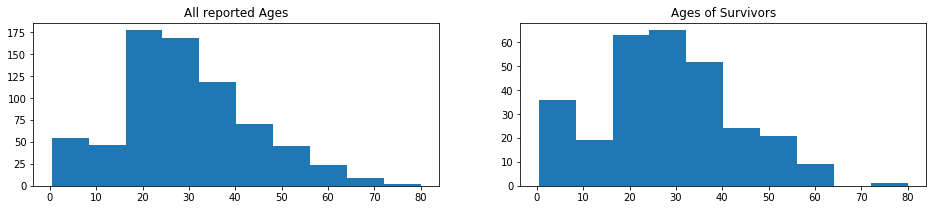

In [6]:
fig = plt.figure(figsize=(16, 3))
ax = fig.add_subplot(1, 2, 1)
ax.hist(df.dropna(subset=['Age']).Age)
plt.title('All reported Ages')
ax = fig.add_subplot(1,2,2)
ax.hist(df.dropna(subset=['Age'])[df['Survived']==1].Age)
plt.title('Ages of Survivors')

How many quantiles should I break my continous data into?  For the titanic dataset I have some intuition regarding how Age might be a relevant variable for predicting survival.  I am assuming that young children will be given priority when loading life boats and therefore will have an advantage of making in out alive.  By graphing percent survival I can validate my hypothesis and gain some idea of the optimial number of bins to use.

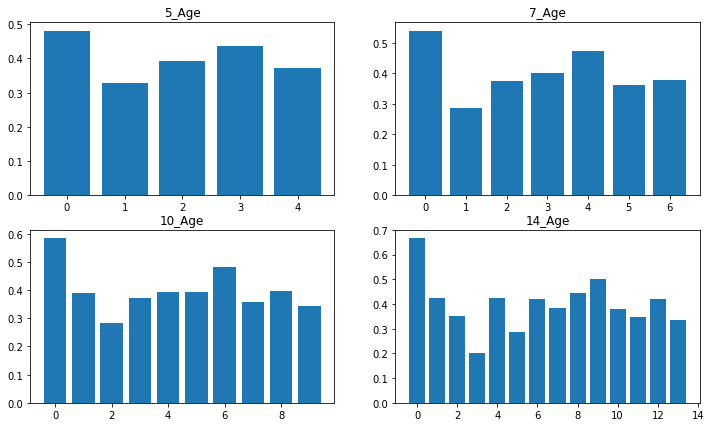

In [7]:
#%% select number of bins to aggregate age data into
quantiles_to_eval = np.array([5, 7, 10, 14])

fig = plt.figure(figsize=(12,7))

qcuts = pd.DataFrame()
for cnt, q in enumerate(quantiles_to_eval): 
    qcut = qcut_quantiles(df, q, 'Age', labels=True)
    qcuts=pd.DataFrame(qcut)
    percents = list()
    
    # Evaluate survival percentage for each discrete age group created above
    for i in np.arange(q):
        
        # note that target variable is found in boolean filter
        percent = qcuts[(df['Survived'] == 1) & (qcuts['{}_Age'.format(q)] == i)].shape[0]/(qcuts['{}_Age'.format(q)] == i).sum()
        percents.append(percent)
        #print(i, percent)
    ax = fig.add_subplot(2,2,cnt+1)
    ax.bar(np.arange(q), percents)
    plt.title('{}_Age'.format(q))
plt.show()

A pattern emerges that confirms my hypothesis but also provides addtional information regarding age groups that are likely to survie.  It appears that there is a bimodal distribution of survivors grouped by age.  The very young and middle age appear to have increased chance of survival.